<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
<table> <tr>

<table width="100%"><td style="background-color:#ffffff;font-size:14px;font-style:italic;text-align:right;">Prepared by <a href="http://cqtech.org" target="_blank"><b>CQTech</b></a>.</td></table>
    
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

# TQSim: Topological Quantum Simulator (Tutorial)
## Topological quantum computation with Fibonacci anyons

<hr>

## Introduction

This is a brief tutorial to implement simple topological quantum circuits using TQSim.

Quantum simulators are important to understand the behavior of real quantum computers and to test quantum algorithms. Since topological quantum computers do not yet exist (at the time these lines were written), this simulator can help to better understand how quantum computation would be carried out on a topological quantum computer. For this purpose, Constantine Quantum Technologies (CQTech) has designed TQSim, an open-source simulator in Python, to give students and quantum computing enthusiasts the opportunity to program a simulated topological quantum computer.

One of the main differences between topological quantum computers and other quantum computing technologies is that the former are based on the fusion space of anyons, which has a different structure than qubits. This tutorial was designed to help you understand how the fusion states of anyons are non-trivially split into computational states and non-computational states.

As is the case with all quantum simulators, TQSim is limited in the number of anyons and qubits it can simulate in a reasonable amount of time. This is because the fusion space of anyons grows exponentially with the number of anyons, and the computational work to build braiding matrices, store,  and multiply them becomes exponentially harder.<br>
This simulator can usually simulate up to 12 anyons on an average laptop. For practical purposes, it is better to work with 3 and 4 anyons per qubit as you can deduce from the previous notebooks.

*We highly encourage you to implement your quantum ideas on TQSim and provide your feedback. You are also welcome to contribute to the simulator on [GitHub](https://github.com/Constantine-Quantum-Tech/tqsim).*


## Content

1. [Single qubit topological circuit](#100)
    1. [Circuit initialization](#110)
    1. [Braiding](#120)
    1. [Example: NOT gate](#130)
1. [Multi-qubit topological circuit](#200)
    1. [Circuit initialization](#210)
    1. [Braiding](#220)
    1. [Example: Entanglement](#230)
1. [Further help on TQSim](#900)

<hr>
<a id="100"></a>

## 1. Single Qubit Topological Circuit

<a id="110"></a>

### Circuit initialization

To simulate a topological quantum circuit, TQSim provides the **AnyonicCircuit** class which allows us to easily create a circuit of topological qudits made of Fibonacci anyons. So we start by importing it from tqsim.

*Note: we will also import LaTex from IPython for later use.*

In [1]:
from tqsim import AnyonicCircuit
from IPython.display import Latex  # Needed to print LaTeX outputs

We then create a circuit by specifying the number of qudits it contains, and the number of anyons that make each qudit. The circuit will thus contain $N_{qudits} \times N_{anyons/qudit}$ anyons in total.

In the example bellow, we will create 1 qudit that is made of 3 anyons.

In [2]:
# Creating a topological quantum circuit
circuit = AnyonicCircuit(nb_qudits=1, nb_anyons_per_qudit=3)

<div class="alert alert-block alert-info"> <b>Note: </b> The qudit is a quantum state of $d$ complex components e.g. $\left(\begin{array}{c}1\\ 0\\ 0\end{array}\right)$. The qubit corresponds to the case $d=2$, e.g. $\left(\begin{array}{c}1\\ 0\end{array}\right)$.</div>

As shown above, _AnyonicCircuit()_ takes two arguments:
1. _nb\_qudits_ : which is the number of qudits in the circuit.
2. _nb\_anyons\_per\_qudit_ : which is the number of anyons per qudit, typically 3 or 4.

By default, *AnyonicCircuit()* will create 1 qudit with 3 anyons. So we could have created the same circuit using:

In [3]:
circuit = AnyonicCircuit()  # Using the default values.

Now that we have created our circuit, we may choose to initialize it in a given state. By default, the circuit is initialized in the 1st qudit basis state.<br>
In our example, our single qudit has a dimension of 3, and thus has 3 basis states. We can check this using the *dim* property of the circuit.

In [4]:
print('This circuit can encode', circuit.dim, 'possible basis states.')

This circuit can encode 3 possible basis states.


We can explicitly see what these states are by printing the circuit basis.

In [5]:
circuit.basis

[{'qudits': [[1, 0]], 'roots': []},
 {'qudits': [[0, 1]], 'roots': []},
 {'qudits': [[1, 1]], 'roots': []}]

These are the 3 basis states which this circuit can encode. We will ignore the *roots* for now and focus on the qudits.

For each basis state, *'qudits'* contains the states of all the qudits in the circuit. Since we only have 1 qudit in our circuit, each basis state only has 1 qudit, represented by a pair $[i, j]$.<br>

Recall that a single 3-anyons qudit is represented by its successive fusion outcomes $i$ and $j$. (see the [Anyons](tqc/B00_Anyons.ipynb) notebook)

        1 1 1 
        \/  / 
        i\ / 
          \    
          j\   

Each qudit in the basis states above encodes $i$ and $j$ in a list that contains both values. Therefore, we may read the output of *circuit.basis* as follows:

* **[[1, 0]] $\rightarrow$ basis[0]** : a 1 qudit state where $i=1$ and $j=0$. This is the non-computational state $\ket{NC}$.
* **[[0, 1]] $\rightarrow$ basis[1]** : a 1 qudit state where $i=0$ and $j=1$. This is the basis state $\ket{0}$.
* **[[1, 1]] $\rightarrow$ basis[2]** : a 1 qudit state where $i=1$ and $j=1$. This is the basis state $\ket{1}$.

Since the circuit is initialized by default in the first basis state, our single qudit is created in the state $\ket{NC}$, which is not useful to us. To change that, we will initialize the circuit in the $\ket{0}$ basis state.

<div class="alert alert-block alert-info"> <b>Note: </b>
From now on, we will call our basis states <i><b>qubits</b></i>, since we will always only consider $\ket{0}$ and $\ket{1}$ as our computational states, discarding $\ket{NC}$ as non-computational.
</div>

In [6]:
circuit.initialize([0,1,0])  # Puts our single qubit in the state [i=0, j=1].

We now have a circuit with a single qubit in the $\ket{0}$ state, and we can start doing some computations on it.

<hr>
<a id="120"></a>

### Braiding

In topological quantum computing (TQC), we change the state of a qubit by braiding its constituent anyons. Braiding can be done in two directions: clockwise or counterclockwise.

We can braid any pair of adjacent anyons in the clockwise direction using the *braid(n, m)* method, where $n < m$.

In [7]:
# Applying clockwise braiding operations
circuit.braid(1, 2)  # On the 1st and 2nd anyons
circuit.braid(2, 3)  # On the 2nd and 3rd anyons

The *draw()* method allows us to draw the anyons world lines, where time points to the right, and the anyons are aranged from bottom to top.

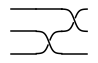

In [8]:
# Drawing the braiding circuit
circuit.draw()

We can see how the first braiding operation acts on the first pair of anyons (bottom), and the second braiding operation acts on the second pair of anyons (top).

To braid them in a counterclockwise direction, we just flip the order of anyons such that $n > m$.

In [9]:
### Apply counter-clockwise braiding operations
circuit.braid(2, 1)  # On the 2nd and 1st anyons
circuit.braid(3, 2)  # On the 3rd and 2nd anyons

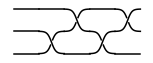

In [10]:
# Drawing the braiding circuit
circuit.draw()

Braids like these can be confusing to read. But we can keep track of our anyons by coloring them using the circuit *drawer*! The drawer contains the list of all the anyons and their visual properties, such as their colors and labels.

Let's color the 1st anyon in red:

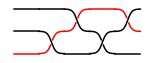

In [11]:
# Highlighting given strands with specific colors
circuit.drawer.anyons[1].color = "red"  # Coloring the 1st anyon in red.
circuit.draw()

We can also label the anyons using the same drawer, but now by setting the label property.

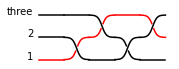

In [12]:
# Labeling the anyons
circuit.drawer.anyons[1].label = 1  # Labeling the 1st anyon using an int
circuit.drawer.anyons[2].label = '2'  # Labeling the 2nd anyon using a number as a string
circuit.drawer.anyons[3].label = 'three'  # Labeling the 3rd anyon using text
circuit.draw()

Once we're done braiding our anyons, we can retrieve the history of all the braiding operations we've performed using the *history()* method. By default, this method returns a list of the raw braiding operations.

In [13]:
# Print the braiding sequences
print('History of braiding operations:', circuit.history())

History of braiding operations: [(1, 2), (2, 3), (2, 1), (3, 2)]


However, a more useful output is the history in terms of braiding operators $\sigma_i$. We can choose the $\LaTeX$ format by passing *\"latex\"* to the *history()* method.

**Note :** we used *Latex()* from *IPython* to display the $\LaTeX$ output.

In [14]:
# Print the braiding sequences in terms of braiding operators
Latex(circuit.history("latex"))

<IPython.core.display.Latex object>

Notice that since this is a product of mathematical operators, ***the first operator will be on the right***!

An even more convinient way to perform braiding operations is to directly use the $\sigma_i$ braiding operators using the *braid_sequence(seq)* method, which takes a sequence of braiding operators and their respective exponents, and applies it to the circuit.

Let's apply the same braid again using this method, but raising all the operators to the 2nd power.

In [15]:
circuit.braid_sequence([[1, 2], [2, 2], [1, -2], [2, -2]])

This method takes a sequence of $[i, p]$, where $i$ is the index of the braiding operator $\sigma_i$, and $p$ is the power to which is raised that operator.

**Note :** the first element of that sequence is the first operation that will be applied! In this case, it is $\sigma_1$.

Now our braid is longer, and is given by the following expression:

In [16]:
Latex(circuit.history("latex"))

<IPython.core.display.Latex object>

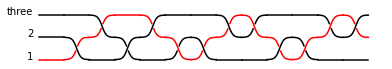

In [17]:
circuit.draw()

As you can see, our braid has now been updated.

<hr>

#### Measurement and Execution

After applying all the necessary braiding on our qubit, the next step is to measure the outcome. This is simply done by calling the *measure()* method. In this version of TQSim, this will measure the whole circuit, regardless of the number of qubits/qudits it contains.

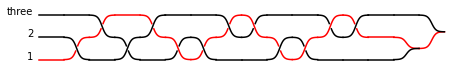

In [18]:
# Measures the circuit by fusing all the anyons
circuit.measure()
circuit.draw()

The measurement is performed by fusing the anyons from the first to last.

At this point, our circuit is complete! We have created a single qubit with three anyons, initialized it in the state $\ket{0}$, performed a quantum operation on it by braiding its anyons, and finally, we have measured its outcome. However, we haven't executed this circuit yet. So none of the previous steps have been carried out.

To execute the topological quantum circuit, we use the *run()* method, to which we pass the number of shots. The circuit will then be simulated and measured for *shots*-number of times. This method will also return a Python dictionary containing the counts for each measured state, as well as the individual measurement results.

In [19]:
# Getting the measurement results for a given number of shots
result = circuit.run(shots=100)

The dictionary *result['counts']* contains all the measured states and the number of times each state was observed.

In [20]:
# Showing the counter
print(result['counts'])

{'1': 86, '2': 14}


And *result['memory']* contains every single measurement.

In [21]:
# Showing every measurement
print(result['memory'])

[1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 2 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1]


<hr>

#### Unitary representation

At any point in our code, we can take a look at the unitary representation of the quantum circuit by calling the *unitary()* method. In our case, since we have 3 basis states, our unitary matrix will be a $3 \times 3$ matrix.

In [22]:
# Get the unitary of the braiding circuit
print(circuit.unitary())

[[ 1.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.02786405-0.91830037j -0.24293414-0.3113375j ]
 [ 0.        +0.j          0.24293414-0.3113375j   0.02786405+0.91830037j]]


Reading matrices in this form can be quite challenging. Instead, we can use the *cplot()* function from TQSim to visualize complex matrices using a color map; each complex value being mapped to a color.

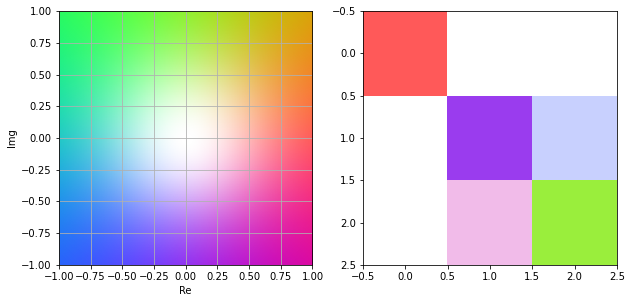

In [23]:
from tqsim import cplot
cplot(circuit.unitary())

<hr>
<a id="130"></a>

### Example: $NOT$-gate

Having explored how to use TQSim to perfom single-qubit operations, or gates, let us now try to implement an $X$ gate.

In TQC, an $X$ gate can be approximated, up to a global phase factor of $i$, by the following braiding sequence:

In [24]:
x_seq = [[1, -2], [2, -4], [1, 4], [2, -2], [1, 2], [2, 2], [1, -2], [2, 4], [1, -2], [2, 4],
        [1, 2], [2, -4], [1, 2], [2, -2], [1, 2], [2, -2], [1, -2]]

Let's now build a single qubit topological circuit that applies this gate.

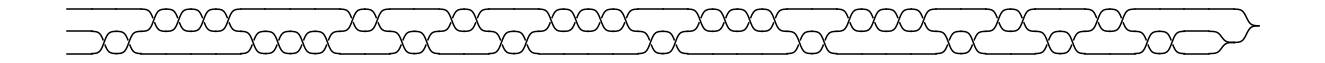

In [25]:
from tqsim import AnyonicCircuit, cplot

# Creating a 1 qubit, 3 anyons circuit and initializing it in the state |0>
not_circuit = AnyonicCircuit()
not_circuit.initialize([0, 1, 0])

# Applying the approximate X gate and measuring
not_circuit.braid_sequence(x_seq)
not_circuit.measure()

# Drawing the circuit
not_circuit.draw()

We first check the unitary of the circuit.

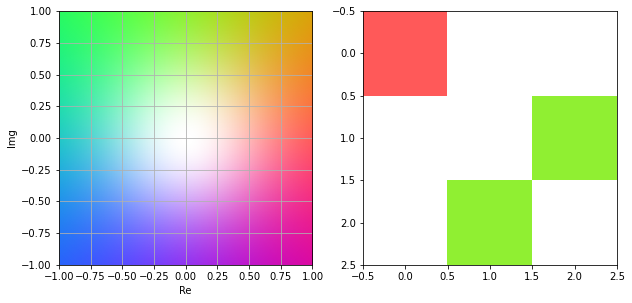

In [26]:
cplot(not_circuit.unitary())

Look at the bottom-right $2 \times 2$ sub-matrix which acts on the set $\{\ket{0}, \ket{1}\}$. It indeed has the same form as an $X$ gate!

Now let's run the circuit 100 times and see what happens to our qubit. Recall that we have initialized it in the state $\ket{0}$.

In [27]:
result = not_circuit.run(shots=100)

In [28]:
print(result['counts'])

{'2': 100}


We get the 3rd basis state, which is $\ket{1}$, 100% of the time!

<hr>
<a id="200"></a>

## 2. Multi-Qubit Topological Circuit

<a id="210"></a>

### Circuit initialization

When we have multiple qubits, the basis states are obtained by first performing the fusions on each qubit, then fusing the outcomes.

**Example :** $N_{qudits} = 2$, $N_{anyons\_per\_qudit} = 3$
    
        1 1 1 1 1 1
        \/  / \/  /
        i\ /  k\ / 
          \     /  
          j\  l/   
            \ /    
             \     
             m\   
               
  
This state is represented by the following Python dict:

    {'qudits': [[i, j], [k, l]], 'roots': [m]}

In this example, we have 2 qubits having the states $[i, j]$ and $[l, k]$. But since we also have to fuse the outcomes $j$ and $l$, this system of two qubits can either fuse to $m=0$ or $m=1$, which we call the root.

Let's create such a circuit in TQSim.

In [29]:
from tqsim import AnyonicCircuit

circuit = AnyonicCircuit(nb_qudits=2, nb_anyons_per_qudit=3)

We can check all the possible basis states for this circuit by printing the *basis* of the circuit.

In [30]:
circuit.basis

[{'qudits': [[1, 0], [1, 0]], 'roots': [0]},
 {'qudits': [[0, 1], [0, 1]], 'roots': [0]},
 {'qudits': [[1, 1], [0, 1]], 'roots': [0]},
 {'qudits': [[0, 1], [1, 1]], 'roots': [0]},
 {'qudits': [[1, 1], [1, 1]], 'roots': [0]},
 {'qudits': [[0, 1], [1, 0]], 'roots': [1]},
 {'qudits': [[1, 1], [1, 0]], 'roots': [1]},
 {'qudits': [[1, 0], [0, 1]], 'roots': [1]},
 {'qudits': [[0, 1], [0, 1]], 'roots': [1]},
 {'qudits': [[1, 1], [0, 1]], 'roots': [1]},
 {'qudits': [[1, 0], [1, 1]], 'roots': [1]},
 {'qudits': [[0, 1], [1, 1]], 'roots': [1]},
 {'qudits': [[1, 1], [1, 1]], 'roots': [1]}]

As you can see, the basis states (we have 13 of them) are combinations of the states $\ket{NC}$, $\ket{0}$, and $\ket{1}$, for both values of $m$. We are free to choose which root $m$ we want our circuit to have simply by initializing it in a state with the chosen value for $m$. We are then guaranteed that our two-qubit system will always keep that same value of $m$!

Let's choose the state $\ket{00}$ with $m=0$. This corresponds to $[0,1]$, $[0,1]$, with roots being $[0]$. Looking back at the list of basis states, we find that this is the 2nd basis state, or *basis[1]*.

We now intialize our circuit in that state. Let's recall that the basis states have dimension 13! Therefore all state vectors will have 13 entries.

In [31]:
# Initializing the circuit in the 2nd state: |00>
circuit.initialize([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<hr>
<a id="220"></a>

### Braiding

Since we now have $6$ anyons in total, we will have $5$ possible braiding operators: $\{\sigma_1, \sigma_2, \sigma_3, \sigma_4, \sigma_5\}$.<br>
Single-qubit gates on qubits $1$ and $2$ are applied using $\{\sigma_1, \sigma_2\}$ and $\{\sigma_4, \sigma_5\}$, respectively, since these two sets only affect a single qubit each.

Let's apply these 4 operators and see what the braid will look like.

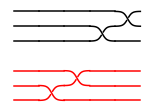

In [32]:
# Acting on the 1st qubit
circuit.braid_sequence([[1, 1], [2, 1]])

# Acting on the 2nd qubit
circuit.braid_sequence([[4, 1], [5, 1]])

# Coloring the 1st qubit in red
for i in [1,2,3]:
    circuit.drawer.anyons[i].color = 'red'

circuit.draw()

Indeed, both qubits evolve independently from each other.

Now we want them to interact! This is done by braiding anyons from both qubits. The operator which does that in this case is $\sigma_3$.<br>
Let's apply $\sigma_3$ twice, or $\sigma_3^2$, to make the two qubits interact, effectively creating a 2-qubit gate.

**Note :** usually, we want to return each anyon to its original qubit. This is why we are applying $\sigma_3^2$ and not $\sigma_3$.

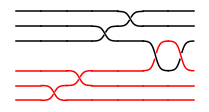

In [33]:
# Acting on the both qubits
circuit.braid_sequence([[3, 2]])  # Sigma_3, to the power 2.
circuit.draw()

We can now measure and then run our circuit to see the outcome.

In [34]:
# Let's not forget to measure!
circuit.measure()
# Running the circuit 100 times.
result = circuit.run(shots=100)

In [35]:
print(result['counts'])

{'0': 37, '1': 29, '2': 3, '3': 7, '4': 24}


With more and more qubits, the counter starts to get more difficult to read. We can use the *memory* from *result* to plot a histogram showing the measurement outcomes.

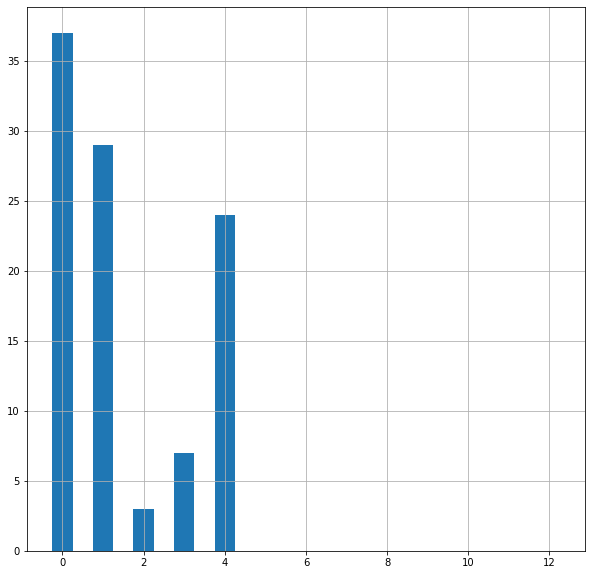

In [36]:
# Showing the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result['memory'], [ii for ii in range(14)], align='left', rwidth=0.5)
plt.grid()
plt.show()

First of all, notice that we have never measured a state with $m=1$! (these states are the last 8 states). Also notice that we have measured all the 2-qubit states $\ket{00}$, $\ket{01}$, $\ket{10}$, and $\ket{11}$, with different probabilities.<br>
The issue is that we have also measured the state $\ket{NC, NC}$. We call this **leakage**, where information *leaks* from the computational states to the non-computation states. This is unfortunately one of the drawbacks of TQC.<br>
Had we worked with *qutrits* instead (or qudits in general), all the information would have remained within the computational set, where the qutrit basis is $\{\ket{0}, \ket{1}, \ket{2}\}$. This, however, is out of the scope of this notebook.

<hr>
<a id="230"></a>

### Example: Entanglement

In the 1st section, we have seen how to apply a single-qubit gate in TQSim, and in the 2nd, we have seen how to apply 2-qubit (and eventually multi-qubit) gates. Let us apply all of that to simulate one of the most interesting two-qubit circuits: an entangling circuit!

Starting from the initial state $\ket{00}$, we will implement a topological circuit that produces the Bell state $\ket{\psi} = \alpha\ket{00} + \beta\ket{11}$, up to a certain degree of accuracy.

We do this, of course, by applying a ***Hadamard*** gate on one qubit, and then a ***CNOT*** on both qubits.

We start by giving the braiding sequences for $H_2$ (acting on the 2nd qubit), and for $CNOT_{2 \rightarrow 1}$.

In [37]:
# H_2
had_sequence_2 = [[4, 2], [5, 2], [4, -2], [5, -2], [4, 2], [5, 4], [4, -2],
                  [5, 2], [4, 2], [5, -2], [4, 2], [5, -2], [4, 4]]

# CNOT_2->1
cnot_sequence = [[3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1],[2, -1], [4, -1], [3, -1],
                 [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1],
                 [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, -1], [2, -1], [2, -1], [1, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1]]

We create a 2-qubit topological circuit, and initialize it in the $\ket{00}$ state. (see basis states above)

In [38]:
from tqsim import AnyonicCircuit, cplot

circuit = AnyonicCircuit(2, 3)
circuit.initialize([0,1,0,0,0,0,0,0,0,0,0,0,0])

We then apply $H_2$ and $CNOT_{2 \rightarrow 1}$.

In [39]:
circuit.braid_sequence(had_sequence_2)
circuit.braid_sequence(cnot_sequence)
circuit.measure()

Let's see how the circuit's braid looks like.

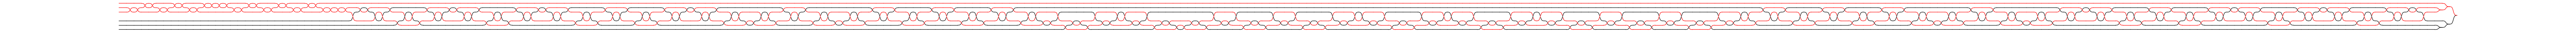

In [40]:
# Coloring the 2nd qubit
for i in [4,5,6]:
    circuit.drawer.anyons[i].color = 'r'
# Showing the braid.
circuit.draw()

<div class="alert alert-block alert-success">
<b>Tip: </b> You may want to open the braid's image in a separate tab (by right-clicking the image) in order to see the braid properly.
</div>

We're now ready to run the circuit. We will run it 1 million times in order to have a chance to see leakage and gate inaccuracies.

In [41]:
res = circuit.run(shots = 10**6)

In [42]:
print(res['counts'])

{'1': 503315, '3': 2, '4': 496683}


As we have seen above, *'1'* and *'4'* correspond to $\ket{00}$ and $\ket{11}$, respectively. And they have been measured with about $50\%$ probability each. Some other states could also be measured with very small probabilities either due to inaccuracies, or leakage. (if you run the circuit again, you'll see different *incorrect* states being measured)

And there we have it! We have successfully simulated the creation and entanglement of 2 topological qubits, using Fibonacci  anyons!

<hr>

 <a id="900"></a>
 
 ### 3. Further help on TQSim
 
 We can use Python's *help()* function to print the documentation of any method, function, or property in TQSim. Here's an example on how we can print the documentation for the *history()* method.

In [43]:
help(circuit.history)

Help on method history in module tqsim.circuit:

history(output: str = 'raw') method of tqsim.circuit.AnyonicCircuit instance
    Returns the history of all braiding operations that were performed
    in the circuit.
    Its output can either be the raw braiding operations (n, m), a list of
    braiding operators (sigmas), or a LaTeX string containing the product
    of all the braiding operators.
    
    Parameters
    ----------
    output : str, optional
        Can either be "raw", "sigmas", or "latex". The default is "raw".
    
    Raises
    ------
    ValueError
        Is raised if an incorrect output format is chosen.
    
    Returns
    -------
    List or String
        Either a list of (n, m) operations, a list of braiding operators,
        or a LaTeX string.

